In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
import json
import pandas as pd
import matplotlib.pyplot as plt

class BaseData:
    def __init__(self, x, y, shift=False):
        self.x = x
        self.y = y
        order = np.argsort(x)
        self.x = x[order]
        self.y = y[order]
        if shift:
            self.y -= np.mean(self.y[:3])
    
    def __repr__(self):
        return f"BD(x={self.x}, y={self.y})"

class LillianData:
    def __init__(self, path, shift=False):
        self.load_data(path, shift)
    
    def load_data(self, path, shift=False):
        df_raw = pd.read_csv(path)
        i = 0
        while i < len(df_raw.keys()):
            key = df_raw.keys()[i]
            next_key = df_raw.keys()[i + 1]
            x = df_raw[key].values[1:].astype(float)
            y = df_raw[next_key].values[1:].astype(float)
            mask = ~np.isnan(x) & ~np.isnan(y)
            setattr(self, key, BaseData(
                x[mask],
                y[mask],
                shift=shift,
            ))
            i += 2
    
    def __getitem__(self, key):
        return getattr(self, key)

    def keys(self):
        return [key for key in self.__dict__.keys() if not key.startswith('_')]
    
    def __repr__(self):
        return f"LD(keys={self.keys()})"


root = '/home/mmccraw/dev/data/09-30-25/lillian-data-manual/'

g_r_smooth = LillianData(os.path.join(root, 'lillian_smooth_gr.csv'), shift=True)
smooth_phi = 0.3, 0.35, 0.4, 0.45, 0.5, 0.55
g_r_rough = LillianData(os.path.join(root, 'lillian_rough_gr.csv'), shift=True)
rough_phi = 0.3, 0.35, 0.4, 0.45, 0.487, 0.535

# smooth - red
# rough - blue
diffusion_exponent = LillianData(os.path.join(root, 'lillian_diffusion_slope.csv'))
diffusion_coef = LillianData(os.path.join(root, 'lillian_diffusion_coefs.csv'))

# phi 0.02
# smooth - red
# rough - blue
translational_diffusion_dilute = LillianData(os.path.join(root, 'lillian_translational_diffusion_dilute.csv'))
rotational_diffusion_dilute = LillianData(os.path.join(root, 'lillian_rotational_diffusion_dilute.csv'))

translational_diffusion_smooth = LillianData(os.path.join(root, 'lillian_translational_diffusion_smooth.csv'))
td_smooth_phi = [0.55, 0.5, 0.45, 0.4, 0.35, 0.3, 0.02]
rotational_diffusion_smooth = LillianData(os.path.join(root, 'lillian_rotational_diffusion_smooth.csv'))
rd_smooth_phi = [0.02, 0.35, 0.5, 0.4, 0.45, 0.55, 0.3]
translational_diffusion_rough = LillianData(os.path.join(root, 'lillian_translational_diffusion_rough.csv'))
td_rough_phi = [0.535, 0.5, 0.45, 0.4, 0.35, 0.3, 0.02]
rotational_diffusion_rough = LillianData(os.path.join(root, 'lillian_rotational_diffusion_rough.csv'))
rd_rough_phi = [0.02, 0.535, 0.52, 0.5, 0.45, 0.35, 0.4, 0.3]  # the pink curve phi is made up.  the phi label is not in the paper.

phi_norm = plt.Normalize(vmin=min(smooth_phi), vmax=max(smooth_phi))
cmap = plt.cm.viridis

In [2]:
# to do:

# look at the translational diffusion

# look at the rotational diffusion

# look at the diffusion slopes and coefficients

# fit g(r)

# compare to the T=1e-4 data (or even the T=1e-5 data on the server?)
# one note: the dilute regime always has diffusive rotations due to the motion of the particles in the fluid.  we never have that.

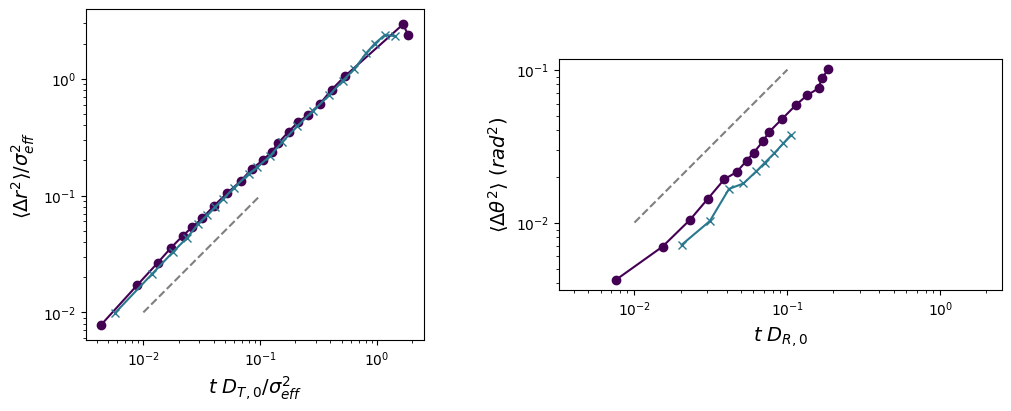

[0.96794409 0.24987279]
[1.00858566 0.28314733]
[ 1.01496001 -0.28740194]
[ 0.996701   -0.45751278]


In [22]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4), constrained_layout=True, sharex=True)
ax[0].plot(translational_diffusion_dilute['red'].x, translational_diffusion_dilute['red'].y, c=cmap(phi_norm(0.02)), marker='o')
ax[0].plot(translational_diffusion_dilute['blue'].x, translational_diffusion_dilute['blue'].y, c=cmap(phi_norm(0.4)), marker='x')
ax[1].plot(rotational_diffusion_dilute['red'].x, rotational_diffusion_dilute['red'].y, c=cmap(phi_norm(0.02)), marker='o')
ax[1].plot(rotational_diffusion_dilute['blue'].x, rotational_diffusion_dilute['blue'].y, c=cmap(phi_norm(0.4)), marker='x')
x = np.logspace(-2, -1, 10)
for a in ax:
    a.plot(x, x, linestyle='--', color='k', alpha=0.5)
    a.set_xscale('log')
    a.set_yscale('log')
    a.set_aspect('equal')
ax[0].set_xlabel(r'$t\ D_{T,0} / \sigma_{eff}^2$', fontsize=14)
ax[0].set_ylabel(r'$\langle \Delta r^2 \rangle / \sigma_{eff}^2$', fontsize=14)
ax[1].set_xlabel(r'$t\ D_{R,0}$', fontsize=14)
ax[1].set_ylabel(r'$\langle \Delta \theta^2 \rangle \ (rad^2)$', fontsize=14)
plt.savefig('figures/diffusion_dilute.png', dpi=300)
plt.show()

print(np.polyfit(np.log10(translational_diffusion_dilute['red'].x), np.log10(translational_diffusion_dilute['red'].y), 1))
print(np.polyfit(np.log10(translational_diffusion_dilute['blue'].x), np.log10(translational_diffusion_dilute['blue'].y), 1))
print(np.polyfit(np.log10(rotational_diffusion_dilute['red'].x), np.log10(rotational_diffusion_dilute['red'].y), 1))
print(np.polyfit(np.log10(rotational_diffusion_dilute['blue'].x), np.log10(rotational_diffusion_dilute['blue'].y), 1))



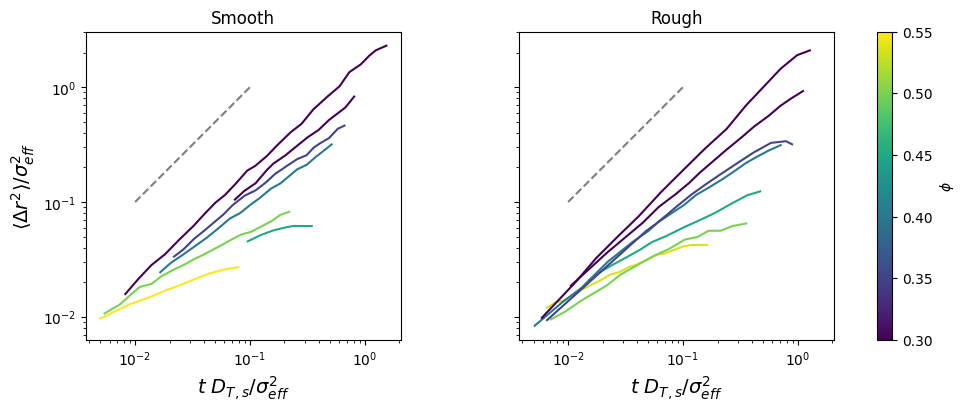

In [4]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4), sharex=True, sharey=True, constrained_layout=True)
trans_smooth_coefs = []
trans_smooth_exponents = []
for i, k in enumerate(translational_diffusion_smooth.keys()):
    ax[0].plot(translational_diffusion_smooth[k].x, translational_diffusion_smooth[k].y, c=cmap(phi_norm(td_smooth_phi[i])))
    exponent, coef = np.polyfit(np.log10(translational_diffusion_smooth[k].x), np.log10(translational_diffusion_smooth[k].y), 1)
    trans_smooth_exponents.append(exponent)
    trans_smooth_coefs.append(10 ** coef)
trans_rough_coefs = []
trans_rough_exponents = []
for i, k in enumerate(translational_diffusion_rough.keys()):
    ax[1].plot(translational_diffusion_rough[k].x, translational_diffusion_rough[k].y, c=cmap(phi_norm(td_rough_phi[i])))
    exponent, coef = np.polyfit(np.log10(translational_diffusion_rough[k].x), np.log10(translational_diffusion_rough[k].y), 1)
    trans_rough_exponents.append(exponent)
    trans_rough_coefs.append(10 ** coef)
ax[0].set_xscale('log')
ax[0].set_yscale('log')
ax[0].set_ylabel(r'$\langle \Delta r^2 \rangle / \sigma_{eff}^2$', fontsize=14)
ax[0].set_title('Smooth')
ax[1].set_title('Rough')
for a in ax:
    x = np.logspace(-2, -1, 10)
    a.plot(x, 10 * x, linestyle='--', color='k', alpha=0.5)
    a.set_xlabel(r'$t\ D_{T,s} / \sigma_{eff}^2$', fontsize=14)
    a.set_aspect('equal')
sm = plt.cm.ScalarMappable(norm=phi_norm, cmap=cmap)
sm.set_array(td_rough_phi)
cbar = plt.colorbar(sm, ax=ax, label=r'$\phi$')
plt.xscale('log')
plt.yscale('log')
plt.show()

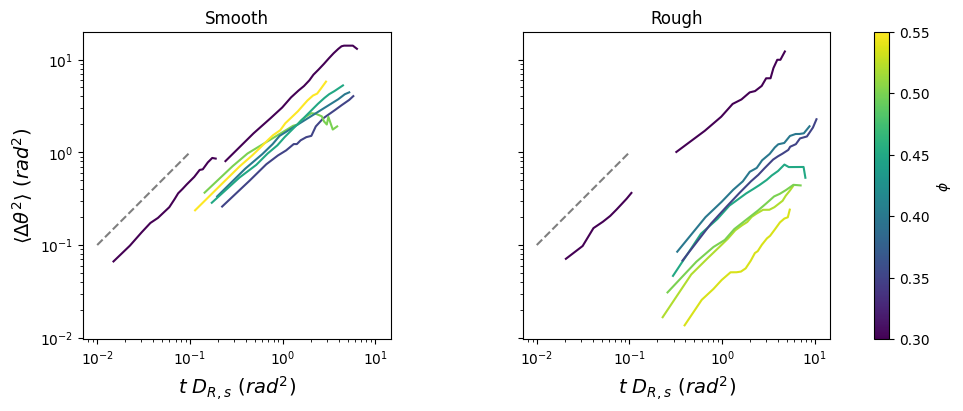

In [6]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4), sharey=True, sharex=True, constrained_layout=True)
rot_smooth_coefs = []
rot_smooth_exponents = []
for i, k in enumerate(rotational_diffusion_smooth.keys()):
    ax[0].plot(rotational_diffusion_smooth[k].x, rotational_diffusion_smooth[k].y, c=cmap(phi_norm(rd_smooth_phi[i])))
    exponent, coef = np.polyfit(np.log10(rotational_diffusion_smooth[k].x), np.log10(rotational_diffusion_smooth[k].y), 1)
    rot_smooth_exponents.append(exponent)
    rot_smooth_coefs.append(10 ** coef)
rot_rough_coefs = []
rot_rough_exponents = []
for i, k in enumerate(rotational_diffusion_rough.keys()):
    ax[1].plot(rotational_diffusion_rough[k].x, rotational_diffusion_rough[k].y, c=cmap(phi_norm(rd_rough_phi[i])))
    exponent, coef = np.polyfit(np.log10(rotational_diffusion_rough[k].x), np.log10(rotational_diffusion_rough[k].y), 1)
    rot_rough_exponents.append(exponent)
    rot_rough_coefs.append(10 ** coef)
for a in ax:
    a.set_xlabel(r'$t\ D_{R,s}\ (rad^2)$', fontsize=14)
    a.set_aspect('equal')
    x = np.logspace(-2, -1, 10)
    a.plot(x, 10 * x, linestyle='--', color='k', alpha=0.5)
ax[0].set_ylabel(r'$\langle \Delta \theta^2 \rangle \ (rad^2)$', fontsize=14)
ax[0].set_title('Smooth')
ax[1].set_title('Rough')
sm = plt.cm.ScalarMappable(norm=phi_norm, cmap=cmap)
sm.set_array(rd_rough_phi)
cbar = plt.colorbar(sm, ax=ax, label=r'$\phi$')
plt.xscale('log')
plt.yscale('log')
plt.show()

/tmp/ipykernel_2273649/624975094.py:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax[0].scatter(r0, np.mean(g[g0_mask]), c=cmap(phi_norm(smooth_phi[i])), marker='o')
/tmp/ipykernel_2273649/624975094.py:19: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax[1].scatter(r0, np.mean(g[g0_mask]), c=cmap(phi_norm(rough_phi[i])), marker='o')


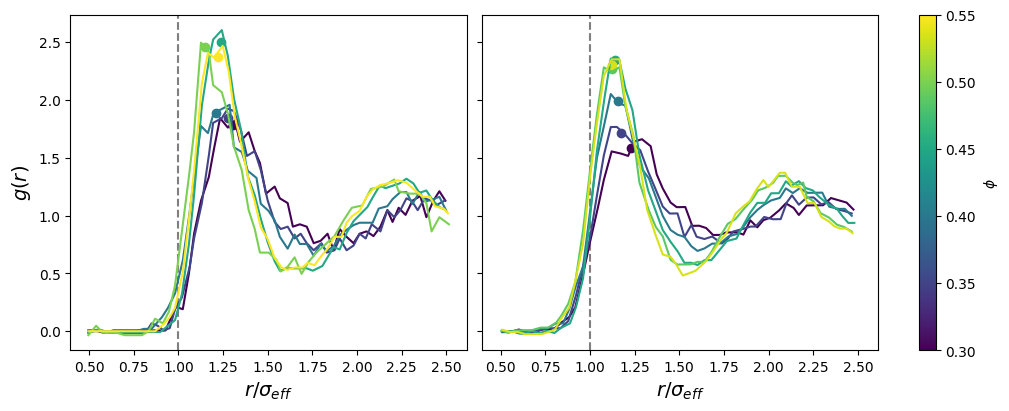

In [21]:
r0_smooth = []
r0_rough = []
fig, ax = plt.subplots(1, 2, figsize=(10, 4), sharey=True, sharex=True, constrained_layout=True)
for i, k in enumerate(g_r_smooth.keys()):
    ax[0].plot(g_r_smooth[k].x, g_r_smooth[k].y, c=cmap(phi_norm(smooth_phi[i])))
    r = g_r_smooth[k].x.copy()
    g = g_r_smooth[k].y.copy()
    g0_mask = g > np.max(g) * 0.9
    r0 = np.mean(r[g0_mask])
    r0_smooth.append(r0)
    ax[0].scatter(r0, np.mean(g[g0_mask]), c=cmap(phi_norm(smooth_phi[i])), marker='o')
for i, k in enumerate(g_r_rough.keys()):
    ax[1].plot(g_r_rough[k].x, g_r_rough[k].y, c=cmap(phi_norm(rough_phi[i])))
    r = g_r_rough[k].x.copy()
    g = g_r_rough[k].y.copy()
    g0_mask = g > np.max(g) * 0.9
    r0 = np.mean(r[g0_mask])
    r0_rough.append(r0)
    ax[1].scatter(r0, np.mean(g[g0_mask]), c=cmap(phi_norm(rough_phi[i])), marker='o')
for a in ax:
    a.axvline(1, color='k', linestyle='--', zorder=0, alpha=0.5)
    a.set_xlabel(r'$r/\sigma_{eff}$', fontsize=14)
ax[0].set_ylabel(r'$g(r)$', fontsize=14)
sm = plt.cm.ScalarMappable(norm=phi_norm, cmap=cmap)
sm.set_array(smooth_phi)
cbar = plt.colorbar(sm, ax=ax, label=r'$\phi$')
plt.savefig('figures/g_r.png', dpi=300)
plt.show()

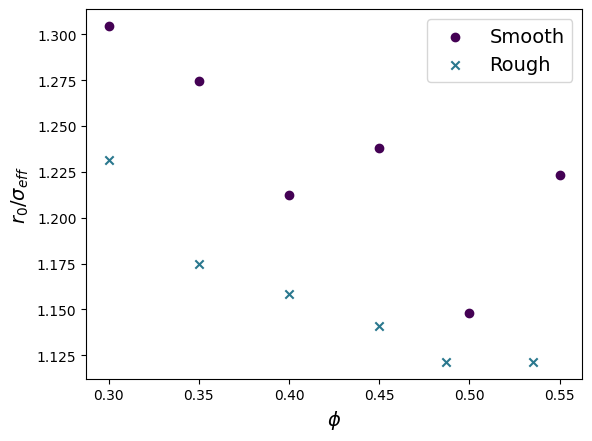

In [28]:
for i, k in enumerate(g_r_smooth.keys()):
    plt.scatter(smooth_phi[i], r0_smooth[i], marker='o', color=cmap(phi_norm(0.02)))
for i, k in enumerate(g_r_rough.keys()):
    plt.scatter(rough_phi[i], r0_rough[i], marker='x', color=cmap(phi_norm(0.4)))
plt.scatter([], [], marker='o', color=cmap(phi_norm(0.02)), label='Smooth')
plt.scatter([], [], marker='x', color=cmap(phi_norm(0.4)), label='Rough')
plt.legend()
plt.xlabel(r'$\phi$', fontsize=14)
plt.ylabel(r'$r_0 / \sigma_{eff}$', fontsize=14)
plt.legend(fontsize=14)
plt.savefig('figures/r0.png', dpi=300)
plt.show()


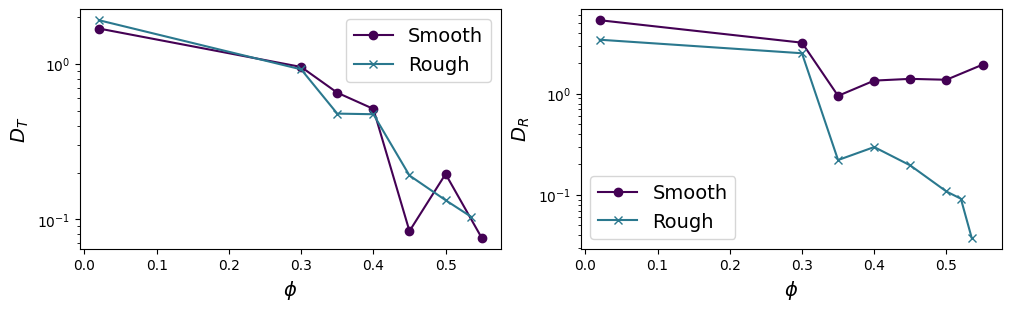

In [23]:
def qp(x, y, ax=None, **kwargs):
    if ax is None:
        ax = plt.gca()
    _x = np.array(x)
    _y = np.array(y)
    order = np.argsort(_x)
    _x = _x[order]
    _y = _y[order]
    ax.plot(_x, _y, **kwargs)

fig, ax = plt.subplots(1, 2, figsize=(10, 3), constrained_layout=True)
qp(td_smooth_phi, trans_smooth_coefs, ax=ax[0], c=cmap(phi_norm(0.02)), marker='o')
qp(td_rough_phi, trans_rough_coefs, ax=ax[0], c=cmap(phi_norm(0.4)), marker='x')
qp(rd_smooth_phi, rot_smooth_coefs, ax=ax[1], c=cmap(phi_norm(0.02)), marker='o')
qp(rd_rough_phi, rot_rough_coefs, ax=ax[1], c=cmap(phi_norm(0.4)), marker='x')
for a in ax:
    a.plot([], [], marker='o', c=cmap(phi_norm(0.02)), label='Smooth')
    a.plot([], [], marker='x', c=cmap(phi_norm(0.4)), label='Rough')
    a.legend(fontsize=14)
ax[0].set_ylabel(r'$D_{T}$', fontsize=14)
ax[1].set_ylabel(r'$D_{R}$', fontsize=14)
for a in ax:
    a.set_xlabel(r'$\phi$', fontsize=14)
    a.set_yscale('log')
plt.savefig('figures/diffusion_coefs.png', dpi=300)
plt.show()
